In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA
# Reading firt few row data
df = pd.read_csv('fraud_detection_dataset.csv') 
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [2]:
# Understand number of rows and columns
df.shape

(51000, 12)

In [3]:
# Showing the number of records in each column, type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [4]:
# Converts the column names into a Python list
df.columns.tolist()

['Transaction_ID',
 'User_ID',
 'Transaction_Amount',
 'Transaction_Type',
 'Time_of_Transaction',
 'Device_Used',
 'Location',
 'Previous_Fraudulent_Transactions',
 'Account_Age',
 'Number_of_Transactions_Last_24H',
 'Payment_Method',
 'Fraudulent']

In [5]:
# Check for duplicate
df.duplicated().sum()

881

In [6]:
# Handle duplicate data
df = df.drop_duplicates()
df.shape

(50119, 12)

In [7]:
# Statistical summary for each numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,50119.0,3004.733195,1152.620471,1000.00,2007.00,2997.00,4005.00,4999.0
Transaction_Amount,47643.0,2999.104599,5061.206189,5.03,1269.83,2523.58,3785.09,49997.8
Time_of_Transaction,47614.0,11.488575,6.921244,0.00,5.00,12.00,17.00,23.0
Previous_Fraudulent_Transactions,50119.0,1.996448,1.415492,0.00,1.00,2.00,3.00,4.0
Account_Age,50119.0,60.029071,34.392569,1.00,30.00,60.00,90.00,119.0
Number_of_Transactions_Last_24H,50119.0,7.495640,4.019806,1.00,4.00,7.00,11.00,14.0
Fraudulent,50119.0,0.049223,0.216335,0.00,0.00,0.00,0.00,1.0


In [8]:
# Checks for missing values
df.isnull().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2476
Transaction_Type                       0
Time_of_Transaction                 2505
Device_Used                         2437
Location                            2500
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2428
Fraudulent                             0
dtype: int64

In [9]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)
df.shape

(50119, 12)

In [10]:
# Handle missing value
# For numeric columns
num_cols = ['Transaction_Amount']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns
cat_cols = ['Device_Used', 'Location', 'Payment_Method']
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

df.isnull().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                     0
Transaction_Type                       0
Time_of_Transaction                 2505
Device_Used                            0
Location                               0
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                         0
Fraudulent                             0
dtype: int64

In [11]:
# Basic type fixes
# Converts the column to numeric, any non-numeric or malformed values become NaN and replaces missing values (NaN) with the median of the column.
df['Time_of_Transaction'] = pd.to_numeric(df['Time_of_Transaction'], errors='coerce').fillna(df['Time_of_Transaction'].median()).astype(int).clip(0,23)

In [12]:
# Drop useless column
df = df.drop(columns=["Transaction_ID"], errors="ignore")
df.head()

,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,4174,1292.76,ATM Withdrawal,16,Tablet,San Francisco,0,119,13,Debit Card,0
1,4507,1554.58,ATM Withdrawal,13,Mobile,New York,4,79,3,Credit Card,0
2,1860,2395.02,ATM Withdrawal,12,Mobile,Unknown,3,115,9,Unknown,0
3,2294,100.10,Bill Payment,15,Desktop,Chicago,4,3,4,UPI,0
4,2130,1490.50,POS Payment,19,Mobile,San Francisco,2,57,7,Credit Card,0


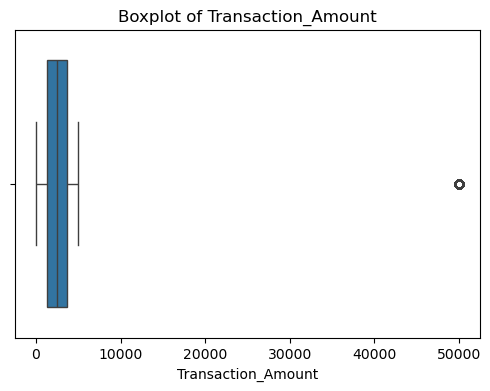

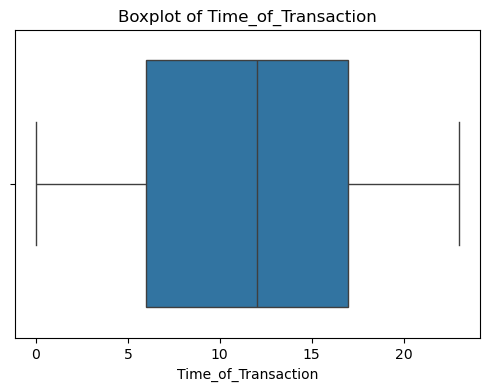

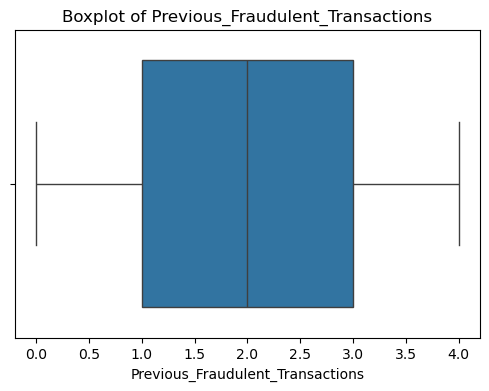

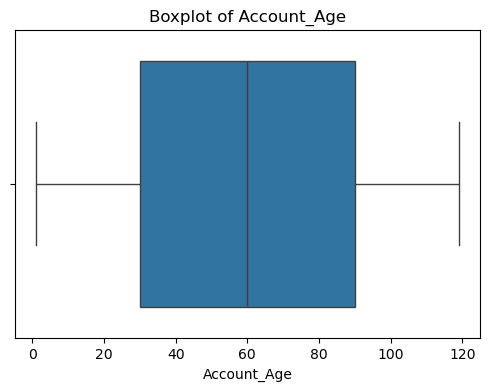

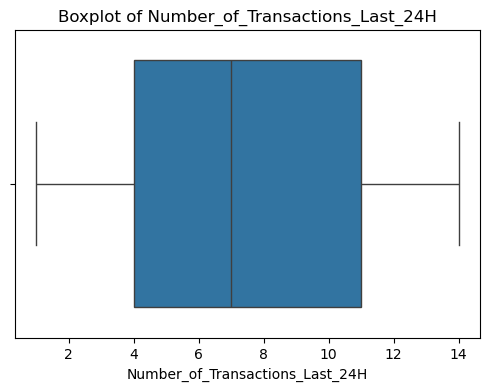

In [13]:
# Check for outliners, check for negative transaction amounts, and impossible timestamps, fradulent number, account age and transaction number
num_cols = ['Transaction_Amount', 'Time_of_Transaction', 'Previous_Fraudulent_Transactions', 'Account_Age', 'Number_of_Transactions_Last_24H']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

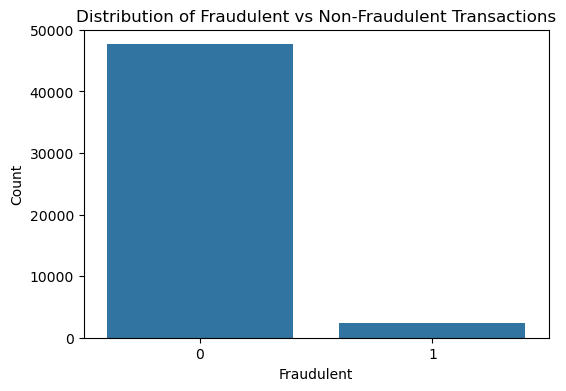

In [14]:
# Data visualization
plt.figure(figsize=(6,4))
sns.countplot(x='Fraudulent', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()

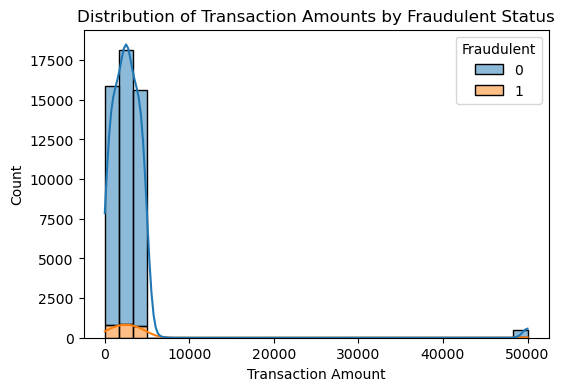

In [15]:
plt.figure(figsize=(6,4))
sns.histplot( x='Transaction_Amount', hue='Fraudulent', data=df, bins=30, kde=True, multiple='stack')
plt.title('Distribution of Transaction Amounts by Fraudulent Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

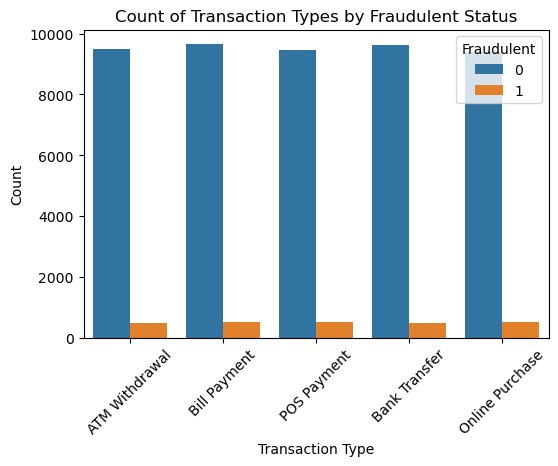

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='Transaction_Type', hue='Fraudulent', data=df)
plt.title('Count of Transaction Types by Fraudulent Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

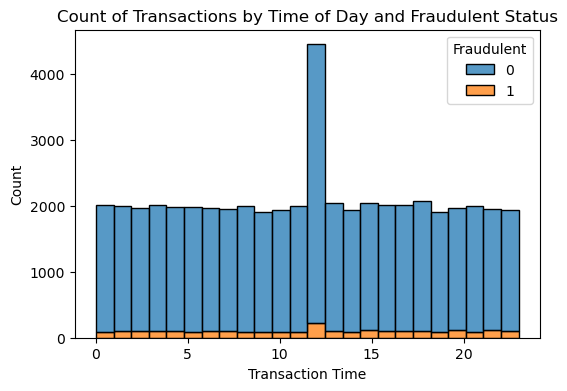

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(x='Time_of_Transaction', hue='Fraudulent', data=df, multiple='stack', bins=24)
plt.title('Count of Transactions by Time of Day and Fraudulent Status')
plt.xlabel('Transaction Time')
plt.ylabel('Count')
plt.show()

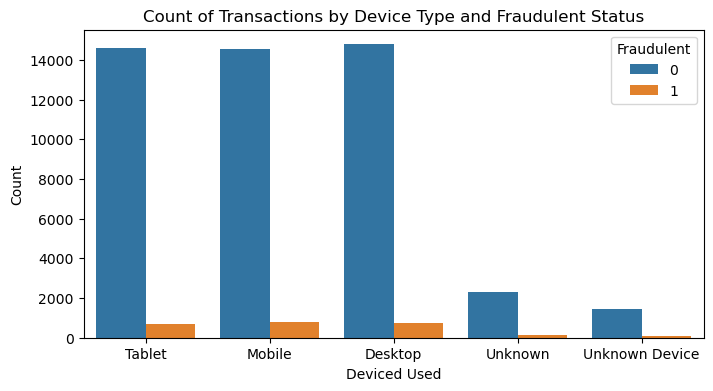

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(x='Device_Used', hue='Fraudulent', data=df)
plt.title('Count of Transactions by Device Type and Fraudulent Status')
plt.xlabel('Deviced Used')
plt.ylabel('Count')
plt.show()

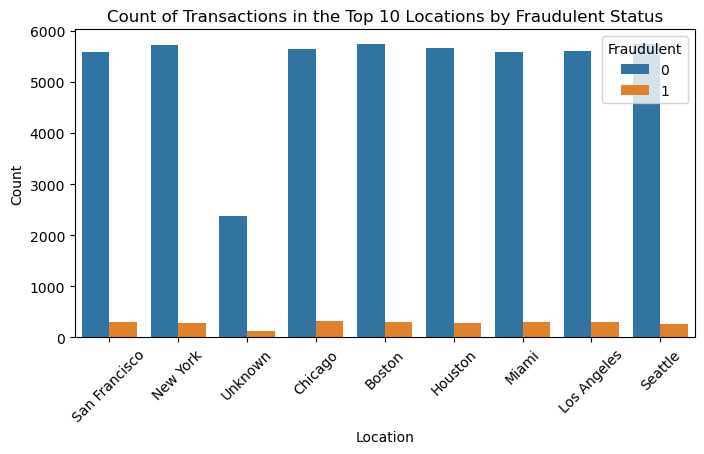

In [19]:
plt.figure(figsize=(8,4))
top_locations = df['Location'].value_counts().head(10).index
sns.countplot(x='Location', hue='Fraudulent', data=df[df['Location'].isin(top_locations)])
plt.title('Count of Transactions in the Top 10 Locations by Fraudulent Status')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

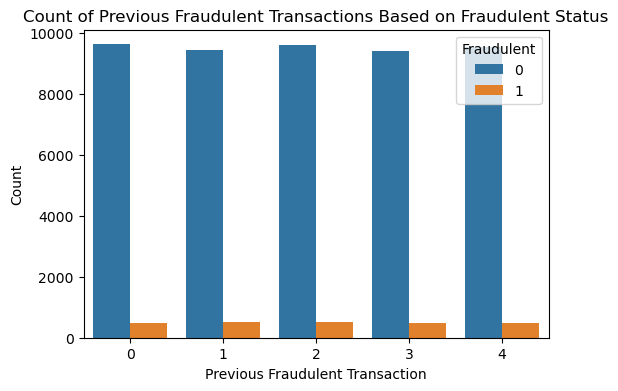

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='Previous_Fraudulent_Transactions', hue='Fraudulent', data=df)
plt.title('Count of Previous Fraudulent Transactions Based on Fraudulent Status')
plt.xlabel('Previous Fraudulent Transaction')
plt.ylabel('Count')
plt.show()

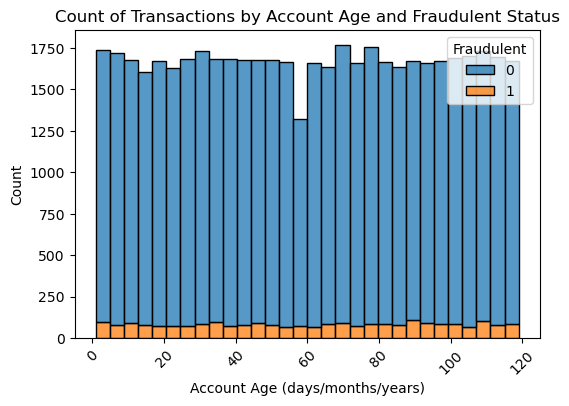

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(x='Account_Age', hue='Fraudulent', data=df, multiple='stack', bins=30)
plt.title('Count of Transactions by Account Age and Fraudulent Status')
plt.xlabel('Account Age (days/months/years)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

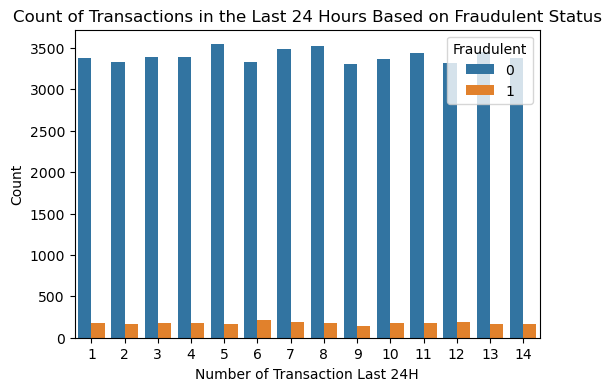

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Number_of_Transactions_Last_24H', hue='Fraudulent', data=df)
plt.title('Count of Transactions in the Last 24 Hours Based on Fraudulent Status')
plt.xlabel('Number of Transaction Last 24H')
plt.ylabel('Count')
plt.show()

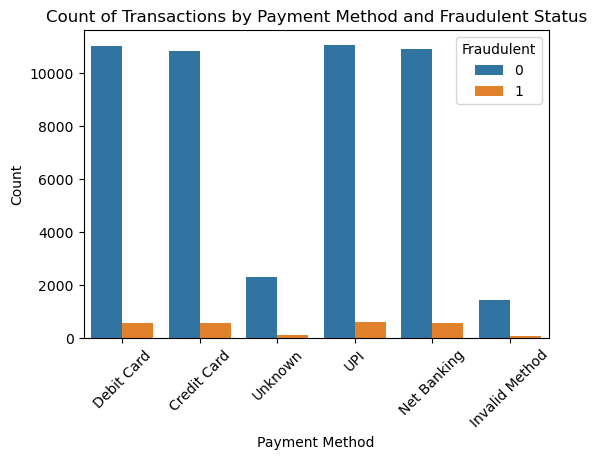

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='Payment_Method', hue='Fraudulent', data=df)
plt.title('Count of Transactions by Payment Method and Fraudulent Status')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

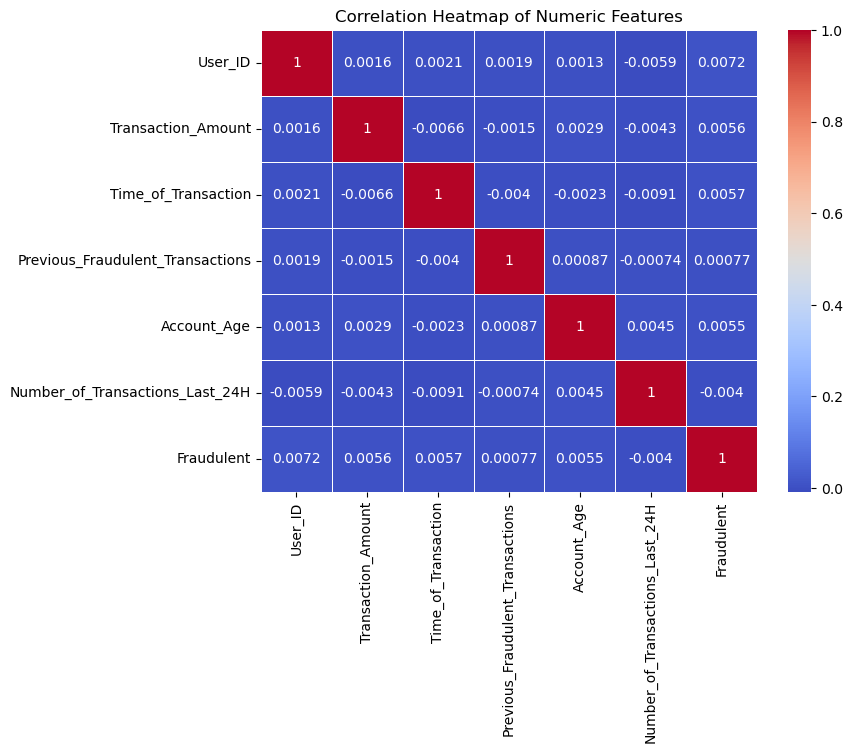

In [24]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),  annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [25]:
# Save cleaned data to new file
df.to_csv('cleaned_fraud_detection_dataset.csv', index=False)

In [26]:
# Load new file
df = pd.read_csv("cleaned_fraud_detection_dataset.csv")
df.head()

,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,4174,1292.76,ATM Withdrawal,16,Tablet,San Francisco,0,119,13,Debit Card,0
1,4507,1554.58,ATM Withdrawal,13,Mobile,New York,4,79,3,Credit Card,0
2,1860,2395.02,ATM Withdrawal,12,Mobile,Unknown,3,115,9,Unknown,0
3,2294,100.10,Bill Payment,15,Desktop,Chicago,4,3,4,UPI,0
4,2130,1490.50,POS Payment,19,Mobile,San Francisco,2,57,7,Credit Card,0


In [27]:
# Create new for original data and old for new labels
if 'Fraudulent' in df.columns:
    df['Fraudulent_orig'] = df['Fraudulent']

In [28]:
# Feature engineering, the process of creating new variables (features) from raw data to make it more informative and predictive
# User aggregates, capture each user’s typical behavior. Too high or too low = break the user’s normal patterns = suspicious
df['user_amount_mean'] = df.groupby('User_ID')['Transaction_Amount'].transform('mean')
df['user_amount_std']  = df.groupby('User_ID')['Transaction_Amount'].transform('std').fillna(0)
df['user_amount_max']  = df.groupby('User_ID')['Transaction_Amount'].transform('max')
df['user_amount_median'] = df.groupby('User_ID')['Transaction_Amount'].transform('median')
df['user_txn_count']   = df.groupby('User_ID')['Transaction_Amount'].transform('count')

In [29]:
# Most common location and most common device, new location or device = suspicious
df['user_mode_location'] = df.groupby('User_ID')['Location'].transform(lambda s: s.mode().iat[0] if not s.mode().empty else s.iloc[0])
df['user_mode_device']   = df.groupby('User_ID')['Device_Used'].transform(lambda s: s.mode().iat[0] if not s.mode().empty else s.iloc[0])

In [30]:
# Rule-based flags. Below each one is rule and make comparison, to determine it is normal or not (suspicious), suspicious = 1
df['high_amount_anomaly'] = (df['Transaction_Amount'] > (df['user_amount_mean'] + 2 * df['user_amount_std'])).astype(int)
df['velocity_24h_flag']   = (df['Number_of_Transactions_Last_24H'] > 20).astype(int)
df['unusual_location']    = (df['Location'] != df['user_mode_location']).astype(int)
df['device_change']       = (df['Device_Used'] != df['user_mode_device']).astype(int)
df['late_night']          = df['Time_of_Transaction'].between(0,4).astype(int)
df['new_account']         = (df['Account_Age'] < 10).astype(int)
df['prev_fraud_flag']     = (df['Previous_Fraudulent_Transactions'] > 0).astype(int)
df['amount_ratio_user_mean'] = df['Transaction_Amount'] / (df['user_amount_mean'] + 1e-9)

In [31]:
# Probabilistic fraud label
# Weights for different risk factors. Higher weight = more important risk factor
w = {
    'high_amount_anomaly': 0.25,
    'unusual_location': 0.20,
    'device_change': 0.15,
    'late_night': 0.05,
    'velocity_24h_flag': 0.15,
    'new_account': 0.05,
    'prev_fraud_flag': 0.15
}

# Compute weighted score
df['fraud_score'] = (
    w['high_amount_anomaly']*df['high_amount_anomaly'] +
    w['unusual_location']*df['unusual_location'] +
    w['device_change']*df['device_change'] +
    w['late_night']*df['late_night'] +
    w['velocity_24h_flag']*df['velocity_24h_flag'] +
    w['new_account']*df['new_account'] +
    w['prev_fraud_flag']*df['prev_fraud_flag']
)

# Convert score to probability using a logistic function (Converts score into smooth probability between 0 and 1)
df['fraud_prob'] = 1 / (1 + np.exp(-10*(df['fraud_score']-0.3))) # Higher score = higher probability = fraud

# Convert that probability into a binary label(0 = normal, 1 = fraud).
np.random.seed(42)
df['Fraudulent'] = df['fraud_prob'].apply(lambda p: np.random.binomial(1, p)) # 1 trial, p is probability that the trial returns 1. So random output

# After assign result, see how many fraudulent now
print("Simulated fraud rate:", df['Fraudulent'].mean())

Simulated fraud rate: 0.6252119954508271


In [32]:
# Feature selection, selecting which columns (features) you want to use to train the model
features_keep = [
    'Transaction_Amount','Transaction_Type','Time_of_Transaction',
    'Device_Used','Location','Previous_Fraudulent_Transactions',
    'Account_Age','Number_of_Transactions_Last_24H','Payment_Method',
    'user_amount_mean','user_amount_std','user_amount_max','user_amount_median','user_txn_count',
    'high_amount_anomaly','velocity_24h_flag','amount_ratio_user_mean',
    'device_change','unusual_location','late_night','new_account','prev_fraud_flag'
]

features_keep = [c for c in features_keep if c in df.columns] # Clean the list
X = df[features_keep].copy() # Input features, use only the selected columns as model input.
y = df['Fraudulent'].copy() # Target label (fraud)

In [33]:
# Check for imbalance data
df['Fraudulent'].value_counts()
df['Fraudulent'].value_counts(normalize=True) * 100

Fraudulent
1    62.5212
0    37.4788
Name: proportion, dtype: float64

In [34]:
# Model Training and Testing
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Group featues based on categorical type or numeric type
categorical_cols = [c for c in ['Transaction_Type','Device_Used','Location','Payment_Method'] if c in X_train.columns]
numeric_cols = [c for c in X_train.columns if c not in categorical_cols]

In [35]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal encode categorical for SMOTENC, converts categorical strings to integer labels due to SMOTENC requires categorical features as integers
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
if categorical_cols: # Select only the categorical columns from train and test convert to strings
    X_train_cat = X_train[categorical_cols].astype(str)
    X_test_cat  = X_test[categorical_cols].astype(str)
    ord_enc.fit(X_train_cat)
    X_train_cat_enc = pd.DataFrame(ord_enc.transform(X_train_cat), columns=categorical_cols, index=X_train.index)
    X_test_cat_enc  = pd.DataFrame(ord_enc.transform(X_test_cat),  columns=categorical_cols, index=X_test.index)
else: # No categorical columns, just create empty DataFrames
    X_train_cat_enc = pd.DataFrame(index=X_train.index)
    X_test_cat_enc  = pd.DataFrame(index=X_test.index)

# Keep numeric features
X_train_num = X_train[numeric_cols].copy()
X_test_num  = X_test[numeric_cols].copy()
# Combine numeric + categorical
X_train_enc = pd.concat([X_train_num, X_train_cat_enc], axis=1)
X_test_enc  = pd.concat([X_test_num,  X_test_cat_enc], axis=1)

In [36]:
# SMOTENC to balance classes
from imblearn.over_sampling import SMOTENC

if categorical_cols:
    cat_indices = [X_train_enc.columns.get_loc(c) for c in categorical_cols] # Identify categorical feature indices
    sm = SMOTENC(categorical_features=cat_indices, sampling_strategy=1.0, random_state=42) # Apply SMOTENC (mixed numeric + categorical features)
    X_train_smote_np, y_train_smote = sm.fit_resample(X_train_enc.values, y_train.values)
    X_train_smote = pd.DataFrame(X_train_smote_np, columns=X_train_enc.columns)
    for c in categorical_cols:
        X_train_smote[c] = X_train_smote[c].round().astype(int) # Rounds fractional values to nearest integer
else:
    from imblearn.over_sampling import SMOTE 
    sm = SMOTE(random_state=42) # No categorical columns, regular SMOTE is used.
    X_train_smote_np, y_train_smote = sm.fit_resample(X_train_enc.values, y_train.values)
    X_train_smote = pd.DataFrame(X_train_smote_np, columns=X_train_enc.columns)

In [37]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Preprocessing: OneHot + StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
    ],
    remainder='drop'
)

X_train_pre = preprocessor.fit_transform(X_train_smote)
X_test_pre  = preprocessor.transform(X_test_enc)

In [38]:
# Train models
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8, # Use only 80 percent of the training rows for each tree chosen randomly
    colsample_bytree=0.8, # Use only 80 percent of the features for each tree chosen randomly
    scale_pos_weight=1, # Weight for positive class
    eval_metric="logloss", # Tells XGBoost which metric to optimize during training, Logloss = standard loss for binary classification
    random_state=42
)
xgb.fit(X_train_pre, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [39]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    max_iter=400,
    random_state=42
)
mlp.fit(X_train_pre, y_train_smote)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=400, random_state=42)

In [40]:
from sklearn.ensemble import VotingClassifier

# Voting ensemble
ensemble = VotingClassifier(
    estimators=[
        ('xgb', xgb),
        ('mlp', mlp)
    ],
    voting='soft' # Average probability scores
)
ensemble.fit(X_train_pre, y_train_smote)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_con...
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('mlp',
                              MLPClassifier(hidden_layer_sizes=(64, 32),
                                            max_iter=400, random_state=42))],
                 voting='soft')

In [41]:
from sklearn.metrics import classification_report, roc_auc_score

def eval_model(model, X_test, y_test, name):
    probs = model.predict_proba(X_test)[:, 1] # ROC-AUC uses probabilities, but for precision, recall, F1, need preds
    preds = model.predict(X_test)

    print(f"\n===== {name} =====")
    print(classification_report(y_test, preds, zero_division=0))
    print("ROC-AUC:", roc_auc_score(y_test, probs))

eval_model(xgb, X_test_pre, y_test, "XGBoost")
eval_model(mlp, X_test_pre, y_test, "MLP")
eval_model(ensemble, X_test_pre, y_test, "Ensemble")


===== XGBoost =====
              precision    recall  f1-score   support

           0       0.72      0.52      0.60      3757
           1       0.75      0.88      0.81      6267

    accuracy                           0.74     10024
   macro avg       0.73      0.70      0.71     10024
weighted avg       0.74      0.74      0.73     10024

ROC-AUC: 0.7941554892969537

===== MLP =====
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      3757
           1       0.77      0.75      0.76      6267

    accuracy                           0.70     10024
   macro avg       0.68      0.69      0.68     10024
weighted avg       0.70      0.70      0.70     10024

ROC-AUC: 0.7544003493887629

===== Ensemble =====
              precision    recall  f1-score   support

           0       0.65      0.59      0.61      3757
           1       0.76      0.81      0.79      6267

    accuracy                           0.73     10024
   macro avg

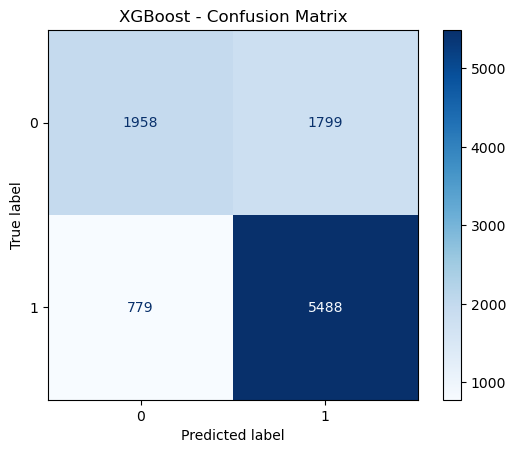

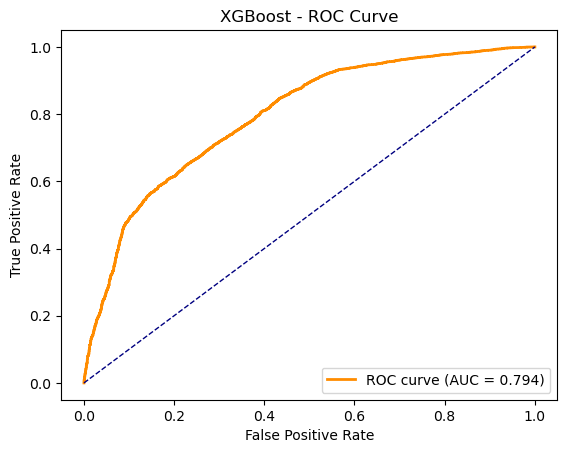

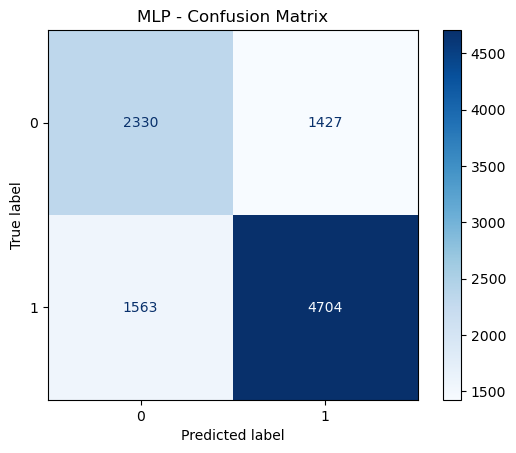

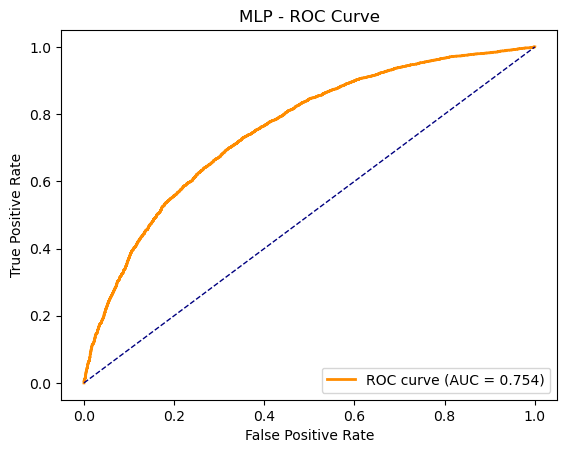

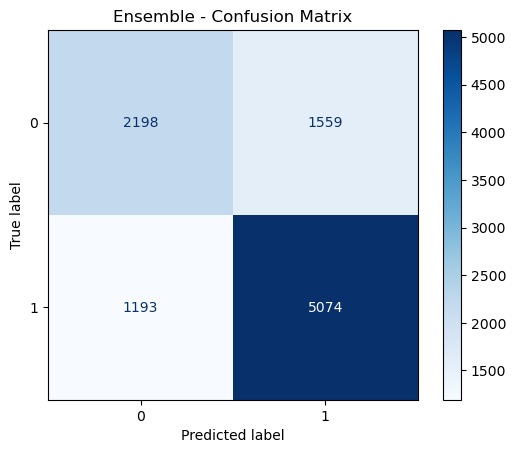

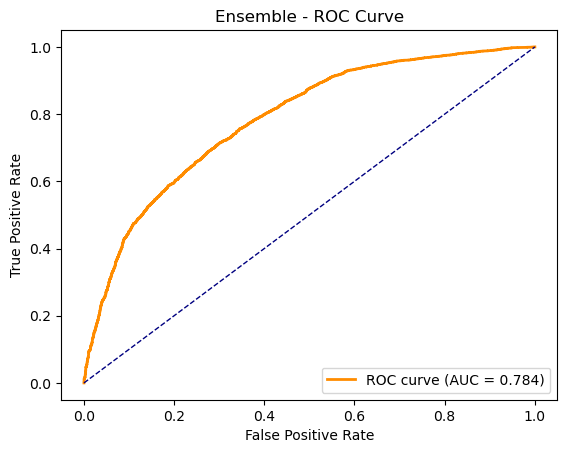

In [42]:
# Confusion and roc graph
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

def plot_metrics(model, X_test, y_test, name):
    # Predict probabilities and classes
    probs = model.predict_proba(X_test)[:,1]
    preds = model.predict(X_test)

    # ===== Confusion Matrix =====
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # ===== ROC Curve =====
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{name} - ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# ===== Evaluate all models =====
plot_metrics(xgb, X_test_pre, y_test, "XGBoost")
plot_metrics(mlp, X_test_pre, y_test, "MLP")
plot_metrics(ensemble, X_test_pre, y_test, "Ensemble")

In [43]:
# Tune all models
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Tuning setup, ensures each fold has the same class ratio.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# XGBoost Tuning
xgb = XGBClassifier(
    objective="binary:logistic", # Tells XGBoost this is a binary classification problem
    eval_metric="logloss",
    tree_method="hist", # Uses histogram-based algorithm
    random_state=42
)

xgb_params = {
    "n_estimators": [200, 400, 600],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.1, 0.2],
    "subsample": [0.7, 1.0],
    "colsample_bytree": [0.6, 1.0],
}

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    scoring="roc_auc",
    n_jobs=-1,
    cv=cv,
    verbose=1,
)

xgb_grid.fit(X_train_pre, y_train_smote)

print("Best XGB:", xgb_grid.best_params_)
      
best_xgb = xgb_grid.best_estimator_
xgb_proba = best_xgb.predict_proba(X_test_pre)[:, 1]

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best XGB: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 600, 'subsample': 0.7}


In [44]:
# MLP Tuning
mlp = MLPClassifier(max_iter=300, random_state=42)

mlp_params = {
    "hidden_layer_sizes": [(64,), (128,), (64,32), (128,64)],
    "activation": ["relu", "tanh"],
    "learning_rate_init": [0.001, 0.01],
    "alpha": [0.0001, 0.001, 0.01]
}

mlp_grid = GridSearchCV(
    estimator=mlp,
    param_grid=mlp_params,
    scoring="roc_auc",
    n_jobs=-1,
    cv=cv,
    verbose=1,
)

mlp_grid.fit(X_train_pre, y_train_smote)

print("Best MLP:", mlp_grid.best_params_)

best_mlp = mlp_grid.best_estimator_
mlp_proba = best_mlp.predict_proba(X_test_pre)[:, 1]

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best MLP: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (64,), 'learning_rate_init': 0.01}


In [45]:
# Grid-search the ensemble weight or Ensemble weight tuning
best_weight = None
best_score = -1
weights = np.arange(0.1, 0.91, 0.1) # A range of values from 0.1 to 0.9

# Fix threshold at 0.5 for weight tuning
# w controls how much XGBoost contributes vs MLP. By trying w = 0.1, 0.2, ..., 0.9, search for the weight that gives the best ROC-AUC
for w in weights:
    ensemble_proba = w * xgb_proba + (1 - w) * mlp_proba # An array of fraud probabilities predicted by the ensemble model
    preds = (ensemble_proba >= 0.5).astype(int) # Converting the predicted probabilities into class labels (0 or 1)
    score = roc_auc_score(y_test, ensemble_proba)
    if score > best_score:
        best_score = score
        best_weight = w

print("Best Ensemble Weight:", best_weight)
print("Best ROC-AUC (weight tuning):", best_score)

# Threshold tuning using best weight
# The cutoff for deciding whether a transaction is considered fraud (1) or not (0)
best_threshold = None
best_score = -1
thresholds = np.arange(0.1, 0.91, 0.05)

# Use the best_weight found in previous step
ensemble_proba = best_weight * xgb_proba + (1 - best_weight) * mlp_proba

for t in thresholds:
    preds = (ensemble_proba >= t).astype(int)
    score = roc_auc_score(y_test, ensemble_proba) 
    if score > best_score:
        best_score = score
        best_threshold = t

print("\nBest Threshold:", best_threshold)
print("Best ROC-AUC (threshold tuning):", best_score)

# proba
final_ensemble = best_weight * xgb_proba + (1 - best_weight) * mlp_proba # Combine those test probabilities and test data
final_preds = (final_ensemble >= best_threshold).astype(int)

Best Ensemble Weight: 0.7000000000000001
Best ROC-AUC (weight tuning): 0.7965644174488988

Best Threshold: 0.1
Best ROC-AUC (threshold tuning): 0.7965644174488988


In [46]:
# Evaluation
# XG and MLP Threshold fix to 0.5
def eval_all_models(y_test, xgb_proba, mlp_proba, final_ensemble, final_preds, best_weight, best_threshold):
    # XGBoost
    print("\n===== Tuned XGBoost =====")
    xgb_preds = (xgb_proba >= 0.5).astype(int)
    print(classification_report(y_test, xgb_preds, zero_division=0))
    print("ROC-AUC:", roc_auc_score(y_test, xgb_proba))

    # MLP
    print("\n===== Tuned MLP =====")
    mlp_preds = (mlp_proba >= 0.5).astype(int)
    print(classification_report(y_test, mlp_preds, zero_division=0))
    print("ROC-AUC:", roc_auc_score(y_test, mlp_proba))

    # Ensemble (threshold + weight tuned)
    print("\n===== Tuned Ensemble =====")
    print("Weight:", best_weight)
    print("Threshold:", best_threshold)

    print(classification_report(y_test, final_preds, zero_division=0))
    print("ROC-AUC:", roc_auc_score(y_test, final_ensemble))

eval_all_models(
    y_test=y_test,
    xgb_proba=xgb_proba,
    mlp_proba=mlp_proba,
    final_ensemble=final_ensemble,
    final_preds=final_preds,
    best_weight=best_weight,
    best_threshold=best_threshold
)


===== Tuned XGBoost =====
              precision    recall  f1-score   support

           0       0.72      0.52      0.61      3757
           1       0.75      0.88      0.81      6267

    accuracy                           0.74     10024
   macro avg       0.74      0.70      0.71     10024
weighted avg       0.74      0.74      0.73     10024

ROC-AUC: 0.7953783329784827

===== Tuned MLP =====
              precision    recall  f1-score   support

           0       0.68      0.55      0.61      3757
           1       0.76      0.85      0.80      6267

    accuracy                           0.74     10024
   macro avg       0.72      0.70      0.71     10024
weighted avg       0.73      0.74      0.73     10024

ROC-AUC: 0.7904094262594298

===== Tuned Ensemble =====
Weight: 0.7000000000000001
Threshold: 0.1
              precision    recall  f1-score   support

           0       0.94      0.05      0.10      3757
           1       0.64      1.00      0.78      6267

    ac

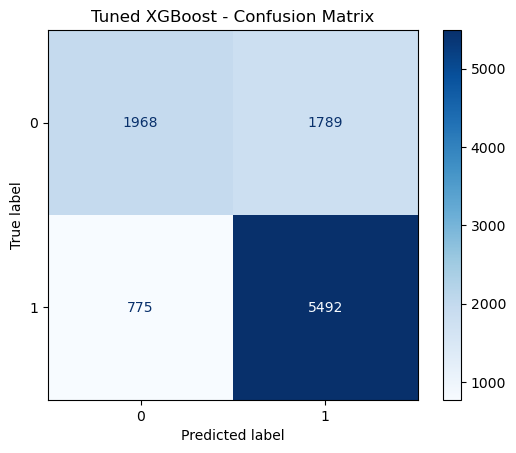

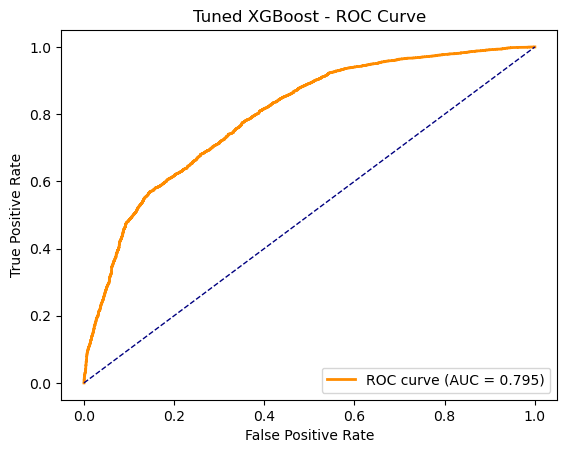

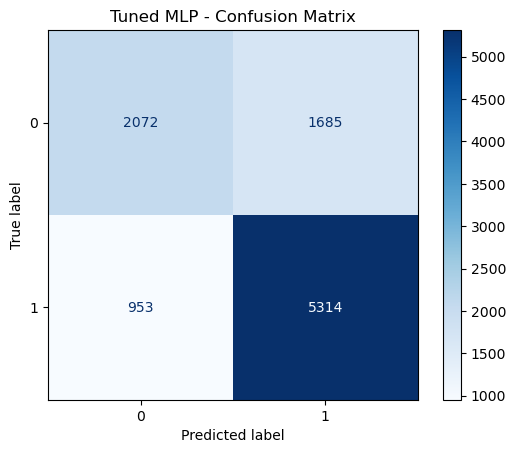

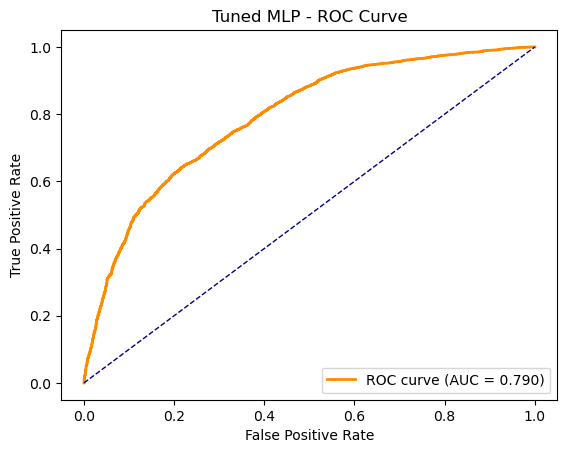

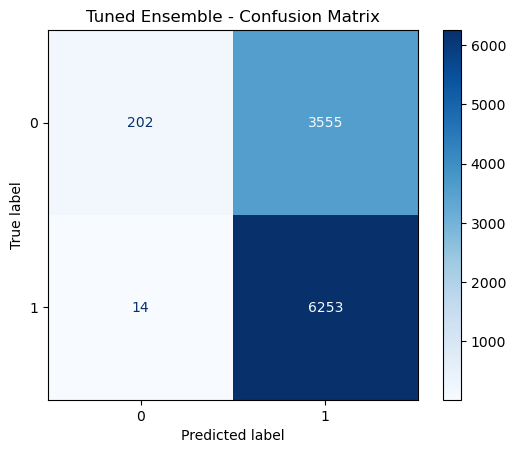

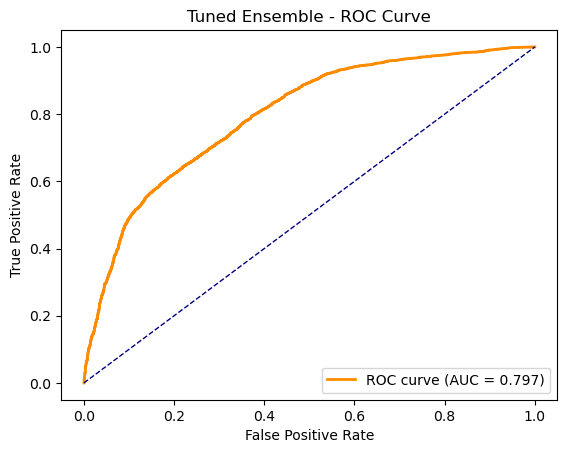

In [92]:
def plot_metrics(y_test, proba, name, custom_preds=None):
    # Use custom predictions if provided, otherwise default threshold 0.5
    if custom_preds is not None:
        preds = custom_preds
    else:
        preds = (proba >= 0.5).astype(int)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{name} - ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

plot_metrics(y_test, xgb_proba, "Tuned XGBoost")
plot_metrics(y_test, mlp_proba, "Tuned MLP")
plot_metrics(y_test, final_ensemble, "Tuned Ensemble", custom_preds=final_preds)

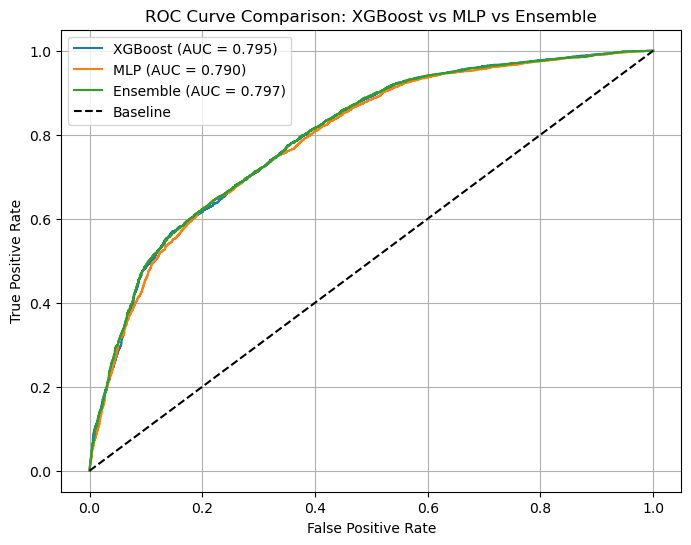

In [94]:
# Final graph comparisons
# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# MLP
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, mlp_proba)
auc_mlp = auc(fpr_mlp, tpr_mlp)

# Ensemble (using best weight)
fpr_ens, tpr_ens, _ = roc_curve(y_test, final_ensemble)
auc_ens = auc(fpr_ens, tpr_ens)

# --- Plot all curves in one graph ---
plt.figure(figsize=(8,6))

plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.3f})")
plt.plot(fpr_mlp, tpr_mlp, label=f"MLP (AUC = {auc_mlp:.3f})")
plt.plot(fpr_ens, tpr_ens, label=f"Ensemble (AUC = {auc_ens:.3f})")

# Random baseline
plt.plot([0,1], [0,1], 'k--', label="Baseline")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: XGBoost vs MLP vs Ensemble")
plt.legend()
plt.grid(True)
plt.show()